In [230]:
%load_ext autoreload
%autoreload 2


from util import *
#from genetic_algorithm import genetic_algorithm
from genetic_al import genetic_algorithm
#from adding import initialize_population


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [231]:

problem_file = 'STAGE1_1.json'
# problem_file = "TEST_K50_1.json"
timelimit = 30

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
    # solution = genetic_algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
    solution = genetic_algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, 50, 100, crossover_rate=0.8, mutation_rate=0.05, elite_size=2, timelimit=60)
except Exception as e:
    exception = f'{e}'


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

Initial best obj = 5284.754
Initial best obj = 4551.258000000001
Initial best obj = 4551.258000000001
Initial best obj = 4551.258000000001
Initial best obj = 5284.754
Initial best obj = 4551.258000000001
Initial best obj = 5284.754
Initial best obj = 5284.754
Initial best obj = 4551.258000000001
Initial best obj = 5284.754
Initial best obj = 5284.754
Initial best obj = 5284.754
Initial best obj = 5284.754
Initial best obj = 5284.754
Initial best obj = 4551.258000000001
Initial best obj = 4551.258000000001
Initial best obj = 5284.754
Initial best obj = 4551.258000000001
Initial best obj = 5284.754
Initial best obj = 4551.258000000001
Initial best obj = 4551.258000000001
Initial best obj = 4551.258000000001
Initial best obj = 5284.754
Initial best obj = 4551.258000000001
Initial best obj = 4551.258000000001
Initial best obj = 4551.258000000001
Initial best obj = 5284.754
Initial best obj = 5284.754
Initial best obj = 5284.754
Initial best obj = 4551.258000000001
Initial best obj = 4551.2

{'feasible': False,
 'infeasibility': 'Solution must be a list of bundle information!',
 'bundles': None,
 'time': 2.7897558212280273,
 'timelimit_exception': False,
 'exception': None,
 'prob_name': 'STAGE1_1',
 'prob_file': 'STAGE1_1.json'}

TypeError: 'NoneType' object is not iterable

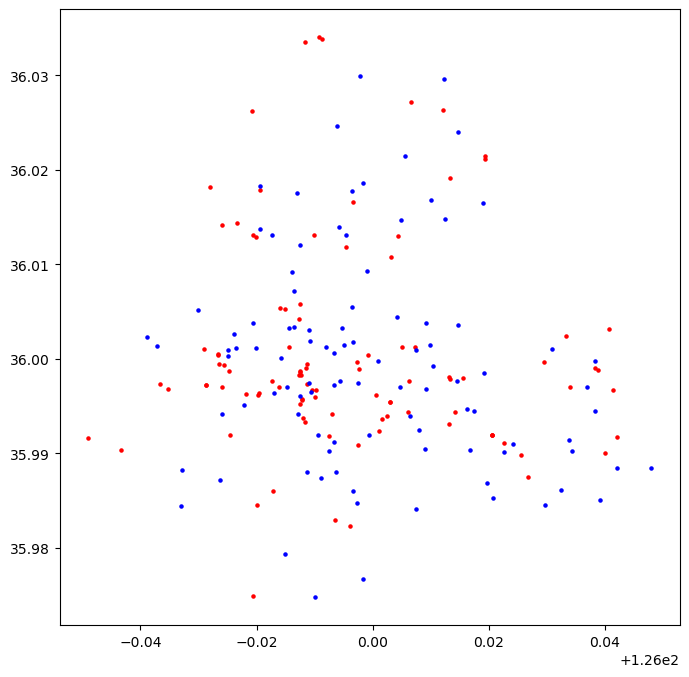

In [232]:
draw_route_solution(ALL_ORDERS, checked_solution)

c:\Users\user\anaconda3\envs\ogc2024\lib\site-packages\matplotlib\_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
c:\Users\user\anaconda3\envs\ogc2024\lib\site-packages\matplotlib\_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
c:\Users\user\anaconda3\envs\ogc2024\lib\site-packages\matplotlib\patches.py:743: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
c:\Users\user\anaconda3\envs\ogc2024\lib\site-packages\matplotlib\transforms.py:2039: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty


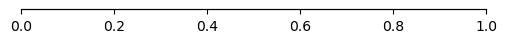

In [ ]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)